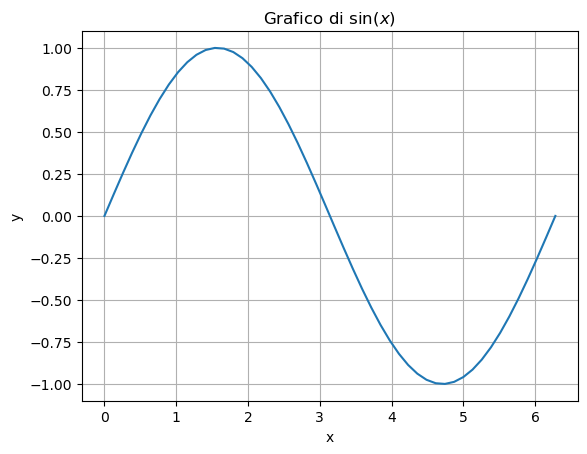

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creiamo due vettori di esempio
a = 0
b = 2*np.pi
N = 50

x = np.linspace(a, b, N)
y = np.sin(x)

# Visualizzazione
plt.plot(x, y)
plt.title(r"Grafico di $\sin(x)$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

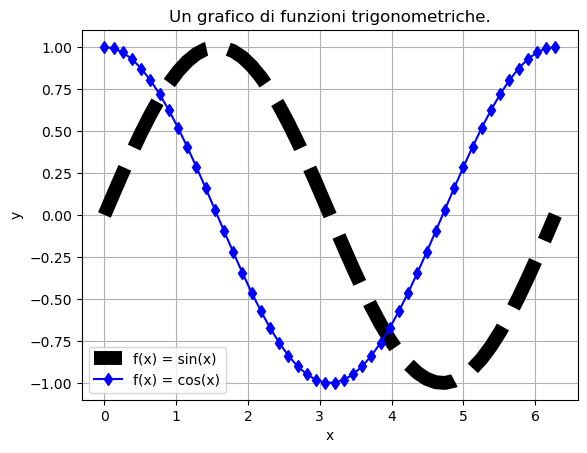

In [2]:
# Creiamo tre vettori esempio
a = 0
b = 2*np.pi
N = 50

x = np.linspace(a, b, N)
y1 = np.sin(x)
y2 = np.cos(x)


# Visualizzazione
plt.plot(x, y1, "k--", linewidth=10)
plt.plot(x, y2, "bd-")
plt.title('Un grafico di funzioni trigonometriche.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['f(x) = sin(x)', 'f(x) = cos(x)'])
plt.grid()
plt.show()

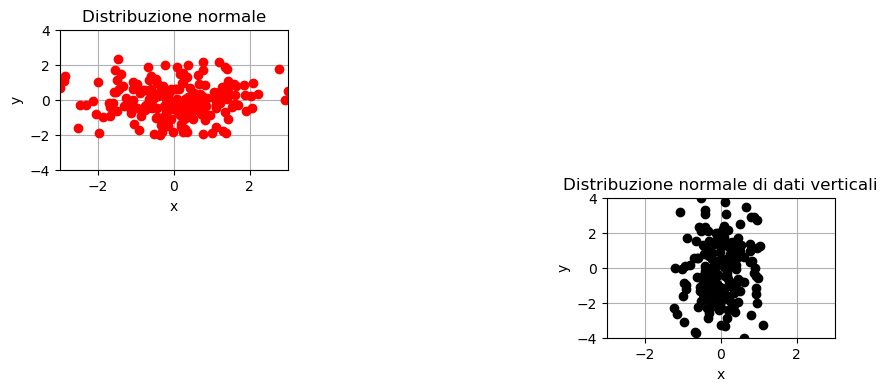

In [3]:
# Creiamo dei dati
N = 200

x1 = np.random.normal(0, 1, (N, ))
y1 = np.random.normal(0, 1, (N, ))

x2 = np.random.normal(0, 0.5, (N, ))
y2 = np.random.normal(0, 2, (N, ))

plt.figure(figsize=(10, 4))

plt.subplot(2, 3, 1)
plt.plot(x1, y1, 'o', color='red')
plt.title('Distribuzione normale')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.grid()

plt.subplot(2, 3, 6)
plt.plot(x2, y2, 'o', color='k')
plt.title('Distribuzione normale di dati verticali')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.grid()

plt.show()

In [4]:
import pandas as pd

# Set data path
data_path = "./data/day_wise.csv"

# Load data
data = pd.read_csv(data_path)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB
None


In [5]:
# Estriamo data (x) e nuovi casi (y)
x = pd.to_datetime(data['Date'])
y = data["New cases"]

# Convertiamo la data (x) in un intero incrementale
x = (x - x.min()).dt.days

In [6]:
import numpy as np

# Convertiamo x e y in numpy array
x = np.array(x)
y = np.array(y)
print(f"Shape of x: {x.shape}, Shape of y: {y.shape}.")

Shape of x: (188,), Shape of y: (188,).


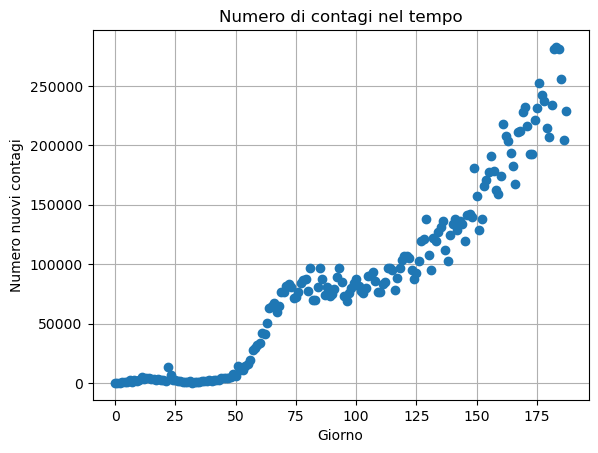

In [7]:
import matplotlib.pyplot as plt

# Visualizzazione
plt.plot(x, y, 'o')
plt.grid()
plt.xlabel("Giorno")
plt.ylabel("Numero nuovi contagi")
plt.title("Numero di contagi nel tempo")
plt.show()

In [8]:
import numpy as np

# Definiamo la funzione f(x, alpha) che prende in input il vettore alpha dei coefficienti e un valore x, e ritorna il valore del rispettivo polinomio

# alpha = (a0, a1, a2, ..., ad)
def f(x, alpha):
    d = alpha.shape[0] - 1 # abbiamo detto che la shape di alpha è (d+1, )

    y = 0
    for i in range(d+1):
        y = y + alpha[i] * x ** i
    return y

In [9]:
# Definiamo alpha_true = (1, 1, ..., 1) 
# NOTA: si può scegliere un QUALUNQUE vettore alpha_true. Quello indicato è solo un esempio.
d = 3 # grado del polinomio
alpha_true = np.ones((d+1,))

# Scegliamo un valore di x
x = 3
y = f(x, alpha_true)
print(f"(x = {x}, y = {y})")

(x = 3, y = 40.0)


In [10]:
# Numero di dati
n = 15

# Definiamo gli x_i
x = np.linspace(0, 1, n)

# Definiamo la deviazione standard del rumore
sigma = 0.2

# Generiamo il rumore
e = np.random.normal(loc=0, scale=sigma, size=(n, ))

# Inizializziamo y
y = np.zeros_like(x)

for i in range(n):
    y[i] = f(x[i], alpha_true) + e[i]

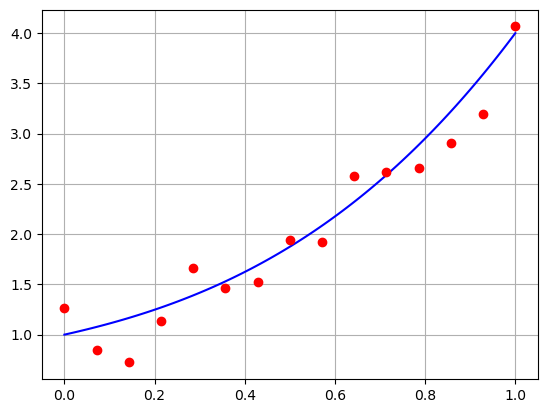

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definiamo la funzione f(x, alpha) che prende in input il vettore alpha dei coefficienti e un vettore x di lunghezza n, e ritorna il valore del rispettivo polinomio calcolato su x elemento per elemento
def f(x, alpha):
    d = alpha.shape[0] - 1 # abbiamo detto che la shape di alpha è (d+1, )

    y = np.zeros_like(x) # Questa è l'unica riga che dobbiamo cambiare rispetto a prima!
    for i in range(d+1):
        y = y + alpha[i] * x ** i
    return y

# Andiamo a rappresentare la curva *vera* in [0, 1]
xx = np.linspace(0, 1, 100)
yy = f(xx, alpha_true)

plt.plot(xx, yy, 'b')
plt.plot(x, y, 'ro')
plt.grid()
plt.show()

In [12]:
def vandermonde(x, d):
    r"""
    Preso in input un numpy array "x" di lunghezza (n, ) contentente i dati, e un valore intero "d" rappresentante il grado del polinomio, 
    costruisce e ritorna la matrice di vandermonde X di grado d, associata a x.

    Parameters:
    x (ndarray): Il vettore dei dati di input.
    d (int): Il grado massimo del polinomio.

    Returns:
    X (ndarray): La matrice di Vandermonde di grado "d", associata ad x.
    """
    n = x.shape[0]
    
    # Inizializzo la matrice di Vandermonde con shape (n, d+1)
    X = np.zeros((n, d+1))
    
    # Costruisco la matrice di Vandermonde
    for i in range(d+1):
        X[:, i] = x ** i
    return X

# Definiamo la matrice di Vandermonde tramite la funzione appena definita con grado d = 5
d = 5
X = vandermonde(x, d)

# Abbiamo X, y
# Calcoliamo il rango della matrice di Vandermonde X
rk_X = np.linalg.matrix_rank(X)
print(f"Il rango di X è massimo? {rk_X == (d+1)}.")

Il rango di X è massimo? True.


In [13]:
# Troviamo la matrice L tale che X^T X = L L^T
L = np.linalg.cholesky(X.T @ X)

# Verifichiamo che X^T X = L L^T
print(f"|| X^T X - L L^T || = {np.linalg.norm(X.T @ X - L @ L.T)}.")

|| X^T X - L L^T || = 1.9860273225978185e-15.


In [14]:
###### Risolviamo il primo sistema:
# Calcoliamo il termine noto X^T y
Xty = X.T @ y

# Troviamo z
z = np.linalg.solve(L, Xty)

###### Risolviamo il secondo sistema:
# Troviamo alpha
alpha_chol = np.linalg.solve(L.T, z)
print(alpha_chol)

[  1.18812579  -5.4636069   31.11063978 -44.82770124  21.14722422
   0.82964428]


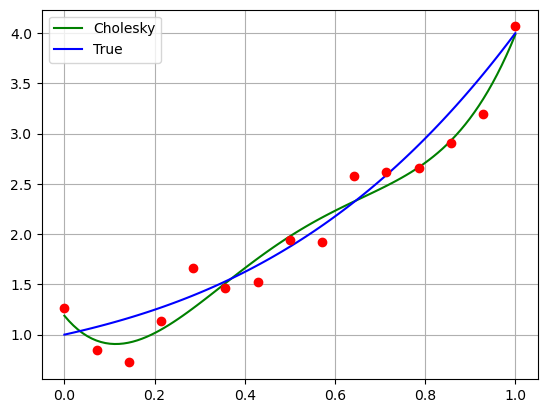

In [15]:
# Rappresentiamo la curva *approssimata* in [0, 1]
xx = np.linspace(0, 1, 100)
yy_true = f(xx, alpha_true)
yy_chol = f(xx, alpha_chol)

plt.plot(xx, yy_chol, 'g')
plt.plot(xx, yy_true, 'b')
plt.plot(x, y, 'ro')
plt.legend(["Cholesky", "True"])
plt.grid()
plt.show()

In [16]:
# Calcoliamo la SVD di X
U, s, VT = np.linalg.svd(X)
print(s.shape)

# Costruiamo la matrice Sigma esplicitamente (per controllare che la SVD sia stata 
# svolta correttamente)
Sigma = np.zeros((n, d+1))
for i in range(d+1):
    Sigma[i, i] = s[i]

# Calcoliamo || X - U * Sigma * VT ||
print(f"|| X - U Sigma V^T || = {np.linalg.norm(X - U @ Sigma @ VT)}")

(6,)
|| X - U Sigma V^T || = 2.4905065272728362e-15


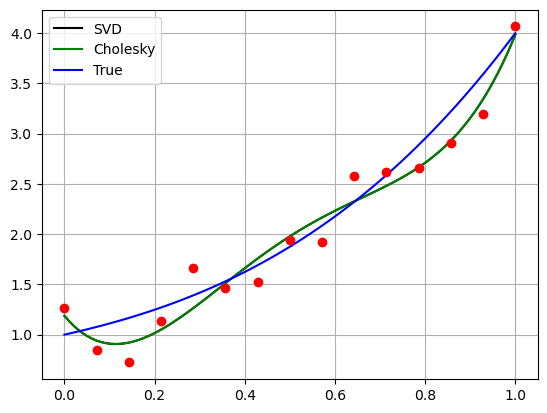

In [17]:
# Inizializzazione di alpha
alpha_svd = np.zeros((d+1, ))

# Aggiornamento
for i in range(d+1):
    alpha_svd = alpha_svd + (U[:, i].T @ y) / s[i] * VT[i, :]

# Rappresentiamo tutte le soluzioni su grafico
xx = np.linspace(0, 1, 100)
yy_true = f(xx, alpha_true)
yy_chol = f(xx, alpha_chol)
yy_svd = f(xx, alpha_svd)

plt.plot(xx, yy_svd, 'k')
plt.plot(xx, yy_chol, 'g')
plt.plot(xx, yy_true, 'b')
plt.plot(x, y, 'ro')
plt.legend(["SVD", "Cholesky", "True"])
plt.grid()
plt.show()